# City Facilities

## Facilities
To help determine what neighborhoods we could deem safe or not we took a look at the facilities each neighborhood had to offer. 
The dataset includes detailed information on properties such as their parcel ID, status (inactive or active), and whether they are rentable. We also examined the type of facility and its primary user, providing insight into the nature and function of each property.

Geographical data, including latitude, longitude, and specific address details such as street name and address number, allowed us to pinpoint the exact locations of these facilities. Additionally, each property is associated with a neighborhood, council district, ward, tract, public works division, PLI division, police zone, and fire zone, giving us a comprehensive view of the administrative and safety resources available in each area.

By considering this data, we were able to assess the density and distribution of facilities across neighborhoods, focusing on their accessibility and their potential role in keeping the residents of each neighborhood feeling safe.  


## Data

We start by importing pandas and getting matplotlib ready to go.  Then we import the data as follows:

fac_csv -> fac_data = This is the facility data

In [3]:
import pandas as pd
%matplotlib inline

data = pd.read_csv('data.csv')
data

,_id,id,parcel_id,inactive,name,rentable,type,primary_user,address_number,street,...,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone,latitude,longitude
0,1,650726265,120-J-300,f,57th Street Park Building,f,Storage,Department of Public Works,NaN,57TH ST,...,Upper Lawrenceville,7,10.0,42003101100,2.0,10.0,2.0,3-5,40.485666,-79.946450
1,2,783044037,2-H-284,f,Albert Turk Graham Park Shelter,f,Shelter,Department of Public Works,39.0,VINE ST,...,Crawford-Roberts,6,3.0,42003030500,3.0,3.0,2.0,2-1,40.440458,-79.984104
2,3,1997158435,23-R-157,f,Allegheny Northside Senior Center and Hazlett ...,t,Senior,CitiParks,5.0,ALLEGHENY SQ E,...,Allegheny Center,1,22.0,42003562700,1.0,22.0,1.0,1-6,40.453099,-80.005343
3,4,204824684,10-F-198,f,Ammon Recreation Center,f,Pool,CitiParks,2217.0,BEDFORD AVE,...,Bedford Dwellings,6,5.0,42003050900,3.0,5.0,2.0,2-5,40.448735,-79.977856
4,5,472140955,013-K-314,f,Arlington Field Lights Building,f,Utility,CitiParks,0.0,STERLING ST,...,South Side Slopes,3,16.0,42003160800,3.0,16.0,3.0,4-22,40.418152,-79.974471
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
407,565,1273938304,85-P-53,NaN,Wightman Park Restroom Building,f,Restrooms,CitiParks,5604.0,SOLWAY ST,...,Squirrel Hill North,8,14.0,42003140300,3.0,14.0,4.0,2-18,40.443078,-79.927032
408,566,1980141313,85-P-53,NaN,Wightman Park Service Building,f,Service,CitiParks,5604.0,SOLWAY ST,...,Squirrel Hill North,8,14.0,42003140300,3.0,14.0,4.0,2-8,40.443626,-79.927644
409,567,933318227,85-P-53,NaN,Wightman Park Shelter,t,Shelter,CitiParks,5604.0,SOLWAY ST,...,Squirrel Hill North,8,14.0,42003140300,3.0,14.0,4.0,2-18,40.443356,-79.926814
410,598,1508172401,7-A-28,NaN,Public Works Facilities Maintenance Division,f,Office,Department of Public Works,1301.0,BEAVER AVE,...,Chateau,6,21.0,42003980600,1.0,21.0,1.0,1-8,40.452744,-80.029729


The data from the table above shows all the deparmtents,neighborhoods ,wards ,fire zones ,police zones ,and the rentability of all the properties in each neighborhood.  

Next, I wanted to specifically see the fire and the police zones and see how many each neightborhood had within them.  

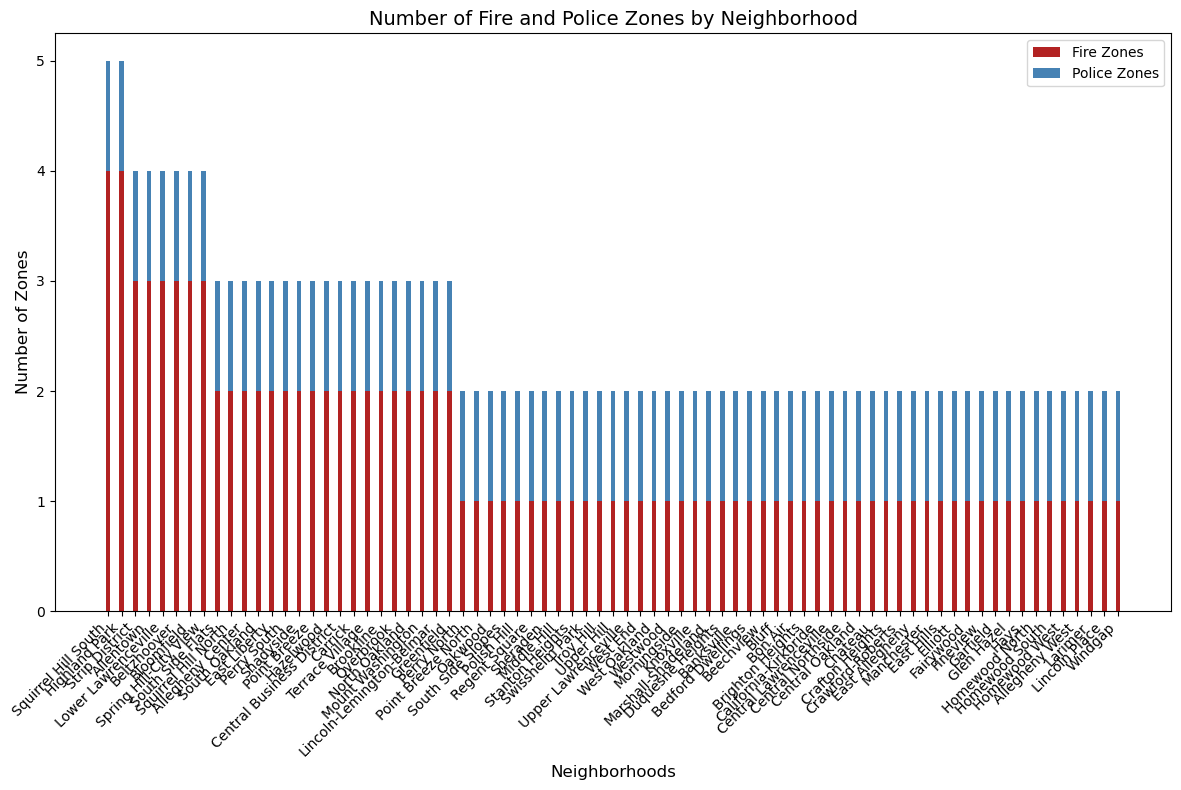

In [17]:
import matplotlib.pyplot as plt

file_path = 'data.csv'
data = pd.read_csv(file_path)

zone_counts = data.groupby('neighborhood').agg(
    unique_fire_zones=('fire_zone', 'nunique'),
    unique_police_zones=('police_zone', 'nunique')
).reset_index()

zone_counts['total_zones'] = zone_counts['unique_fire_zones'] + zone_counts['unique_police_zones']

zone_counts = zone_counts.sort_values(by='total_zones', ascending=False)

zone_counts.to_csv('sorted_neighborhood_zone_counts.csv', index=False)

plt.figure(figsize=(12, 8))
bar_width = 0.35
x = range(len(zone_counts))

plt.bar(x, zone_counts['unique_fire_zones'], width=bar_width, label='Fire Zones', color='firebrick')
plt.bar(x, zone_counts['unique_police_zones'], width=bar_width, bottom=zone_counts['unique_fire_zones'], label='Police Zones', color='steelblue')

plt.xlabel('Neighborhoods', fontsize=12)
plt.ylabel('Number of Zones', fontsize=12)
plt.title('Number of Fire and Police Zones by Neighborhood', fontsize=14)
plt.xticks(x, zone_counts['neighborhood'], rotation=45, ha='right', fontsize=10)
plt.legend()

plt.tight_layout()
plt.savefig('neighborhood_zones_chart.png')

plt.show()

Although the names of eahc neighborhood are squished together, you can see two clear winners in the graph, those nieghborhoods being Squirrel Hill South, and Highland Park, both having 4 fire zones and 1 police zone in each neighborhood.  Below it is also represented in a map, where the red circles show the most combined fire and police zones relative to the other neightborhoods across Pittsburgh.  

In [39]:
import pandas as pd
import geopandas as gpd
import folium
from shapely.geometry import Point
import matplotlib.pyplot as plt
import branca.colormap as cm

file_path = 'data.csv'
data = pd.read_csv(file_path)
zone_counts = data.groupby('neighborhood').agg(
    unique_fire_zones=('fire_zone', 'nunique'),
    unique_police_zones=('police_zone', 'nunique'),
    avg_latitude=('latitude', 'mean'),
    avg_longitude=('longitude', 'mean')
).reset_index()

zone_counts['total_zones'] = zone_counts['unique_fire_zones'] + zone_counts['unique_police_zones']
gdf = gpd.GeoDataFrame(zone_counts, geometry=geometry, crs="EPSG:4326")
colormap = cm.LinearColormap(
    colors=["lightgreen", "yellow", "orange", "red"],
    vmin=gdf['total_zones'].min(),
    vmax=gdf['total_zones'].max(),
    caption="Total Zones (Fire + Police)"
)
m = folium.Map(location=[data['latitude'].mean(), data['longitude'].mean()], zoom_start=12)
for _, row in gdf.iterrows():
    folium.CircleMarker(
        location=[row['avg_latitude'], row['avg_longitude']],
        radius=7,
        color=colormap(row['total_zones']),
        fill=True,
        fill_color=colormap(row['total_zones']),
        fill_opacity=0.8,
        popup=folium.Popup(
            f"<b>Neighborhood:</b> {row['neighborhood']}<br>"
            f"<b>Unique Fire Zones:</b> {row['unique_fire_zones']}<br>"
            f"<b>Unique Police Zones:</b> {row['unique_police_zones']}<br>"
            f"<b>Total Zones:</b> {row['total_zones']}",
            max_width=300
        )
    ).add_to(m)
colormap.add_to(m)
m.save("sillymapwahoo.html")
m


Now that I have all of the information from where the fire and police zones are located, along with where they are places relatively to the map of Pittsburgh, I wanted to see which neighborhoods have the most fire and police zones relative to the size of the neighborhood.  By comparing the density of these zones to the area of each neighborhood, I can better understand how these services are distributed and whether certain areas have disproportionate coverage or gaps in access. This analysis could also help identify patterns or trends that might inform resource allocation or urban planning decisions.

In [20]:
import pandas as pd
import geopandas as gpd
import folium
from shapely.geometry import Point
import matplotlib.pyplot as plt
import branca.colormap as cm

file_path = 'data.csv'
data = pd.read_csv(file_path)

zone_counts = data.groupby('neighborhood').agg(
    neighborhood_size=('neighborhood', 'size'),  
    unique_fire_zones=('fire_zone', 'nunique'),
    unique_police_zones=('police_zone', 'nunique')  
).reset_index()

zone_counts['total_zones'] = zone_counts['unique_fire_zones'] + zone_counts['unique_police_zones']

#zone_counts_sorted = zone_counts.sort_values(by=['neighborhood_size', 'total_zones'], ascending=False)

print(zone_counts_sorted)


           neighborhood  neighborhood_size  unique_fire_zones  \
33        Highland Park                 30                  4   
63  Squirrel Hill South                 29                  4   
50          Perry North                 20                  1   
11            Brookline                 19                  2   
65       Strip District                 15                  3   
..                  ...                ...                ...   
53   Point Breeze North                  1                  1   
64      Stanton Heights                  1                  1   
66       Swisshelm Park                  1                  1   
70  Upper Lawrenceville                  1                  1   
72         West Oakland                  1                  1   

    unique_police_zones  total_zones  
33                    1            5  
63                    1            5  
50                    1            2  
11                    1            3  
65                    1 

This small chart just is able to show that Highland Park is larger than Squirrel Hill South, meaning there are the same amount of fire and police zones in both Squirrel Hill South and Highland Park, but with Highland Park being smaller, so less area to cover, making it safer than Squirrel Hill South, and the safest neighborhood based on city facilities.  